# 🌍 Global Development Dashboard

This notebook presents key development indicators across countries from 1952 to 2007 using a Gapminder-style dataset.

We will explore:

- **Life expectancy trends globally**
- **The relationship between GDP and life expectancy**
- **Country-level visual analysis**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## 📈 Global Life Expectancy Over Time

This line plot shows how the average life expectancy has increased across the globe between 1952 and 2007.

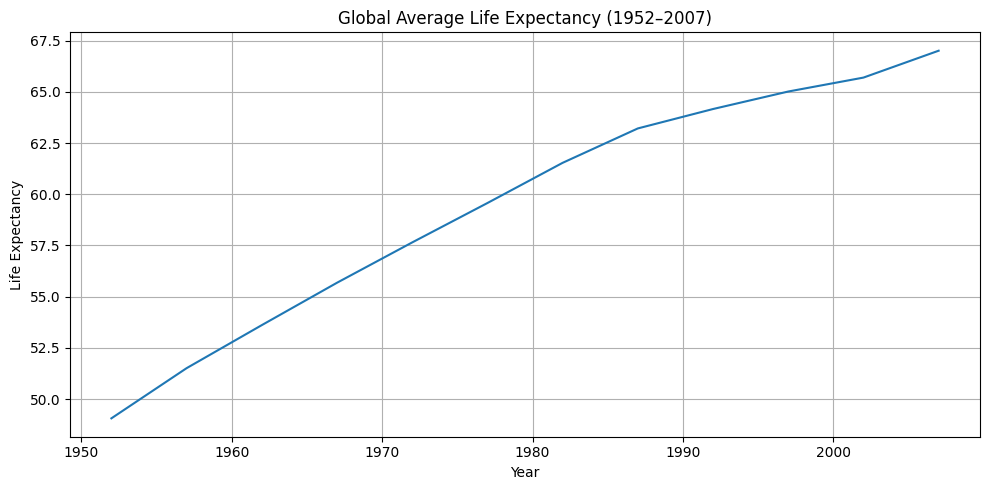

In [3]:
avg_lifeexp = df.groupby("year")["lifeExp"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_lifeexp, x="year", y="lifeExp")
plt.title("Global Average Life Expectancy (1952–2007)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.tight_layout()
plt.show()

## 💰 GDP vs Life Expectancy (2007)

This scatter plot shows the relationship between GDP per capita and life expectancy for each country in 2007. The size of the bubbles represents population, and color represents continent.

- Countries with higher GDP per capita tend to have higher life expectancy.
- The x-axis is in log scale to better visualize differences across countries.

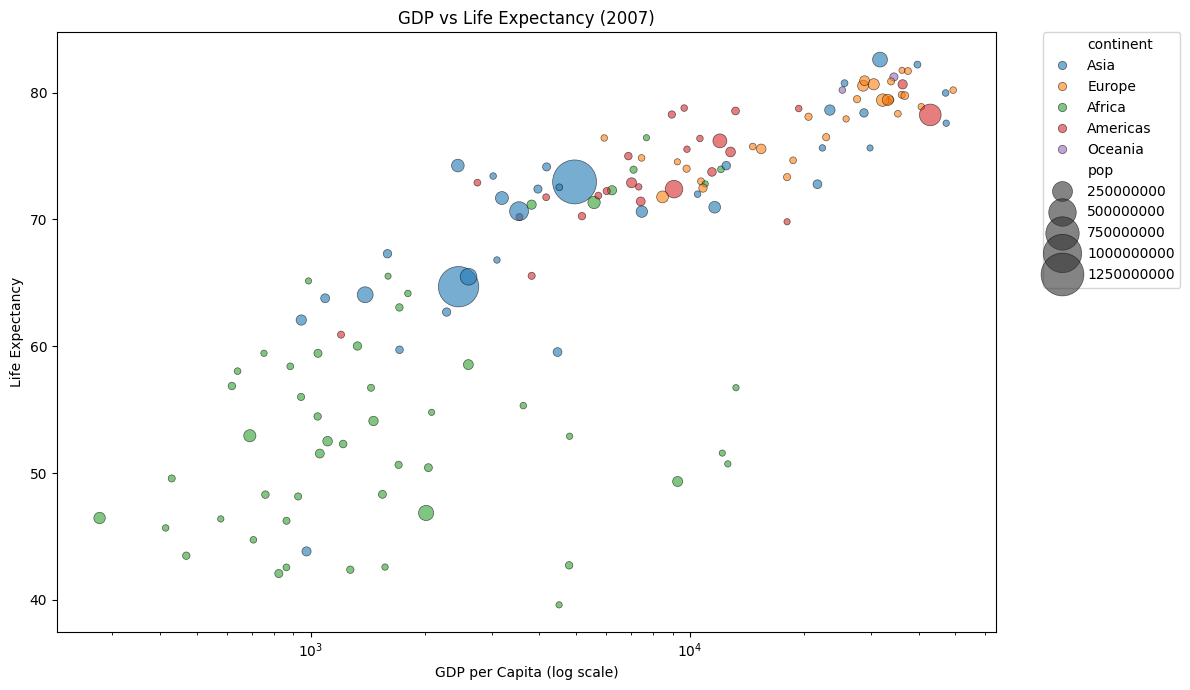

In [4]:
df_2007 = df[df["year"] == 2007]

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_2007, x="gdpPercap", y="lifeExp", size="pop", hue="continent",
                sizes=(20, 1000), alpha=0.6, edgecolor="black", linewidth=0.5)
plt.xscale("log")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("Life Expectancy")
plt.title("GDP vs Life Expectancy (2007)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

## 🗺️ Country-Level Life Expectancy Dashboard

Use the dropdown to select a country and view the trend in life expectancy from 1952 to 2007.

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

def plot_country_life_expectancy(country):
    country_data = df[df["country"] == country]
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=country_data, x="year", y="lifeExp", marker="o")
    plt.title(f"Life Expectancy in {country} (1952–2007)")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.ylim(20, 90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(plot_country_life_expectancy, country=sorted(df["country"].unique()));

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

## ✅ Conclusion

This dashboard gives a high-level view of global development patterns:

- Life expectancy has increased steadily worldwide.
- GDP and life expectancy are positively correlated.
- Countries vary significantly in development levels and health outcomes.